In [2]:
%matplotlib inline
import numpy as np
import numpy.linalg as LA
import matplotlib.pyplot as plt
from tqdm import tqdm as tqdm

In [3]:
def density1(z):
    z = np.reshape(z, [z.shape[0], 2])
    z1, z2 = z[:, 0], z[:, 1]
    norm = np.sqrt(z1 ** 2 + z2 ** 2)
    exp1 = np.exp(-0.5 * ((z1 - 2) / 0.8) ** 2)
    exp2 = np.exp(-0.5 * ((z1 + 2) / 0.8) ** 2)
    u = 0.5 * ((norm - 4) / 0.4) ** 2 - np.log(exp1 + exp2)
    return np.exp(-u)

In [4]:
def density2(z):
    z = np.reshape(z, [z.shape[0], 2])
    z1, z2 = z[:, 0], z[:, 1]
    w1 = lambda x: np.sin(2 * np.pi * x/4)
    u = 0.5 * ((z2 - w1(z1))/0.4) ** 2
    u[np.where(np.abs(z1) > 4)[0]] = 1e8
    return np.exp(-u)

In [5]:
def mvn_density(X, mu=np.array([[0, 0]]), sig=np.eye(2)):
    sqrt_det_2pi_sig = np.sqrt(2 * np.pi * LA.det(sig))
    sig_inv = LA.inv(sig)
    X = X[:, None, :] - mu[None, :, :]
    return np.exp(-np.matmul(np.matmul(X, np.expand_dims(sig_inv, 0)), (X.transpose(0, 2, 1)))/2)/sqrt_det_2pi_sig

In [6]:
def metropolis_hastings(target_density, size=500000):
    burnin_size = 10000
    size += burnin_size
    x0 = np.array([[0, 0]])
    xt = x0
    samples = []
    for i in tqdm(range(size)):
        xt_candidate = np.array([np.random.multivariate_normal(xt[0], np.eye(2))])
        accept_prob = (target_density(xt_candidate))/(target_density(xt))
        if np.random.uniform(0, 1) < accept_prob:
            xt = xt_candidate
        samples.append(xt)
    samples = np.array(samples[burnin_size:])
    samples = np.reshape(samples, [samples.shape[0], 2])
    return samples

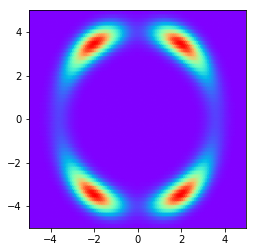

In [7]:
r = np.linspace(-5, 5, 1000)
z = np.array(np.meshgrid(r, r)).transpose(1, 2, 0)
z = np.reshape(z, [z.shape[0] * z.shape[1], -1])

q0 = density1(z)
plt.hexbin(z[:,0], z[:,1], C=q0.squeeze(), cmap='rainbow')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim([-5, 5])
plt.ylim([-5, 5])
plt.savefig('../report/imgs/example1-density.png', dpi=300)

100%|██████████| 510000/510000 [01:18<00:00, 6457.27it/s]


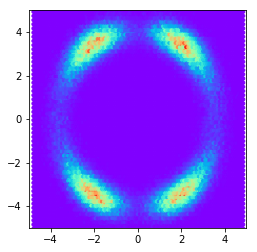

In [8]:
samples = metropolis_hastings(density1)

plt.hexbin(samples[:,0], samples[:,1], cmap='rainbow')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim([-5, 5])
plt.ylim([-5, 5])
plt.show()

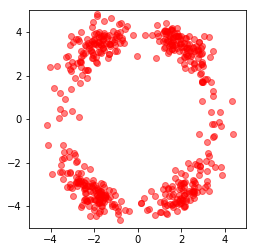

In [9]:
batch = samples[np.random.randint(samples.shape[0], size=500)]
plt.scatter(batch[:,0], batch[:,1], c='red', alpha=0.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim([-5, 5])
plt.ylim([-5, 5])
plt.savefig('../report/imgs/example1-samples.png', dpi=300)

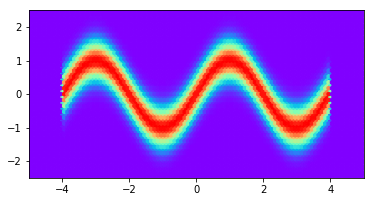

In [7]:
r = np.linspace(-5, 5, 1000)
z = np.array(np.meshgrid(r, r)).transpose(1, 2, 0)
z = np.reshape(z, [z.shape[0] * z.shape[1], -1])

q0 = density2(z)
plt.hexbin(z[:,0], z[:,1], C=q0.squeeze(), cmap='rainbow')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim([-5, 5])
plt.ylim([-2.5, 2.5])
plt.savefig('../report/imgs/example2-density.png', dpi=300)

100%|██████████| 510000/510000 [02:19<00:00, 3643.55it/s]


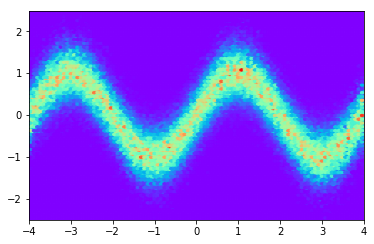

In [8]:
samples = metropolis_hastings(density2)

plt.hexbin(samples[:,0], samples[:,1], cmap='rainbow')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim([-4, 4])
plt.ylim([-2.5, 2.5])
plt.show()

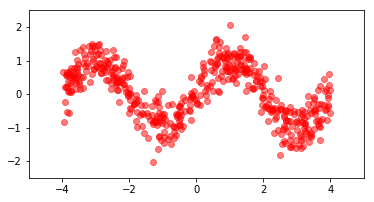

In [9]:
batch = samples[np.random.randint(samples.shape[0], size=500)]
plt.scatter(batch[:,0], batch[:,1], c='red', alpha=0.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim([-5, 5])
plt.ylim([-2.5, 2.5])
plt.savefig('../report/imgs/example2-samples.png', dpi=300)